In [ ]:
  ### 1. Mount Google Drive ###

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!nvidia-smi


Sat Jun  1 11:18:43 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!ls /content/gdrive/MyDrive/Yolo_Trainning

ls: cannot access '/content/gdrive/MyDrive/Yolo_Trainning': No such file or directory


In [ ]:
### 2. Define root directory ###

ROOT_DIR = '/content/gdrive/MyDrive/Yolo_Trainning'

In [ ]:
import ultralytics

In [ ]:
### 3. Install Ultralytics ###
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.6/779.6 kB 8.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
import

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="HZa2hbkZPFsvzc3ly8rw")
project = rf.workspace("project1-gqrcz").project("text_block")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.11, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to text_block-1 in yolov8:: 100%|██████████| 10802/10802 [00:01<00:00, 5648.52it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/text_block-1/data.yaml epochs=50 imgsz=640


Ultralytics YOLOv8.2.11 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/text_block-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

In [ ]:
%cd /content

/content


In [ ]:
!ls /content/train

images	labels	labels.cache


In [ ]:
!ls

classes.json  drive  gdrive  __MACOSX  sample_data  test  train  valid


In [ ]:
!yolo task=detect mode=predict model="/content/gdrive/MyDrive/train_model/runs/detect/train/weights/best.pt" source="https://englishunite.com/wp-content/uploads/2021/08/penguins-reading.jpg"


Ultralytics YOLOv8.2.27 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

100% 172k/172k [00:00<00:00, 194kB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
image 1/1 /content/penguins-reading.jpg: 640x480 10 block - v1 2021-11-04 3-50pms, 111.6ms
Speed: 15.2ms preprocess, 111.6ms inference, 1857.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
### import YOLO
from ultralytics import YOLO
model = YOLO("/content/gdrive/MyDrive/train_model/runs/detect/train/weights/best.pt")
result = model.predict(show=False,source = "/content/penguins-reading.jpg")
print(result)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


image 1/1 /content/penguins-reading.jpg: 640x480 10 block - v1 2021-11-04 3-50pms, 109.9ms
Speed: 3.6ms preprocess, 109.9ms inference, 1722.2ms postprocess per image at shape (1, 3, 640, 480)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'block - v1 2021-11-04 3-50pm', 1: 'blocktext'}
obb: None
orig_img: array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ..

In [ ]:
boxes = result[0].boxes

In [ ]:
boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0')
conf: tensor([0.9093, 0.9006, 0.8911, 0.8857, 0.8764, 0.8432, 0.7465, 0.6941, 0.5923, 0.4542], device='cuda:0')
data: tensor([[6.1133e+01, 5.4027e+02, 7.4207e+02, 6.6909e+02, 9.0933e-01, 0.0000e+00],
        [6.1560e+01, 7.5583e+02, 7.5007e+02, 8.6225e+02, 9.0059e-01, 0.0000e+00],
        [6.0004e+01, 8.7917e+02, 7.4988e+02, 1.0121e+03, 8.9114e-01, 0.0000e+00],
        [6.1187e+01, 4.1276e+02, 7.4224e+02, 5.2146e+02, 8.8566e-01, 0.0000e+00],
        [6.0473e+01, 3.1569e+02, 7.3896e+02, 3.9456e+02, 8.7640e-01, 0.0000e+00],
        [6.2490e+01, 6.8894e+02, 7.5049e+02, 7.3779e+02, 8.4318e-01, 0.0000e+00],
        [3.2154e+02, 2.6677e+02, 4.9387e+02, 2.9830e+02, 7.4646e-01, 0.0000e+00],
        [2.9878e+02, 1.0695e+03, 4.8686e+02, 1.0936e+03, 6.9410e-01, 0.0000e+00],
        [3.4993e+02, 6.3144e+01, 4.6561e+02, 9.3469e+01, 5.9228e-01, 0.0000e+00],
        [3.6638

In [ ]:
boxes.xyxy

tensor([[  61.1330,  540.2745,  742.0717,  669.0877],
        [  61.5604,  755.8297,  750.0685,  862.2453],
        [  60.0038,  879.1739,  749.8762, 1012.0760],
        [  61.1872,  412.7635,  742.2363,  521.4581],
        [  60.4727,  315.6851,  738.9567,  394.5600],
        [  62.4900,  688.9419,  750.4855,  737.7936],
        [ 321.5418,  266.7709,  493.8700,  298.3031],
        [ 298.7767, 1069.5223,  486.8559, 1093.6088],
        [ 349.9326,   63.1441,  465.6052,   93.4693],
        [ 366.3843,   71.6927,  466.4021,   91.7904]], device='cuda:0')

In [ ]:
box_temp = boxes.xyxy

In [ ]:
box_xx = [{"id": i, "coordinates": (box[0].item(), box[1].item(), box[2].item(), box[3].item())} for i, box in enumerate(box_temp)]


In [ ]:
box_xx

[{'id': 0,
  'coordinates': (61.13296890258789,
   540.2745361328125,
   742.0717163085938,
   669.0877075195312)},
 {'id': 1,
  'coordinates': (61.560420989990234,
   755.8296508789062,
   750.0685424804688,
   862.2453002929688)},
 {'id': 2,
  'coordinates': (60.003761291503906,
   879.1738891601562,
   749.876220703125,
   1012.0759887695312)},
 {'id': 3,
  'coordinates': (61.187171936035156,
   412.7635498046875,
   742.236328125,
   521.4580688476562)},
 {'id': 4,
  'coordinates': (60.47270202636719,
   315.68505859375,
   738.9566650390625,
   394.55999755859375)},
 {'id': 5,
  'coordinates': (62.489990234375,
   688.94189453125,
   750.4855346679688,
   737.7935791015625)},
 {'id': 6,
  'coordinates': (321.54180908203125,
   266.77093505859375,
   493.8699951171875,
   298.3031311035156)},
 {'id': 7,
  'coordinates': (298.77667236328125,
   1069.5223388671875,
   486.8559265136719,
   1093.6087646484375)},
 {'id': 8,
  'coordinates': (349.9325866699219,
   63.144126892089844,
  

In [ ]:
#box_temp = [{"id": i, "coordinates": (box[0].item(), box[1].item(), box[2].item(), box[3].item())} for i, box in enumerate(box_temp)]

# Hàm sắp xếp
def sort_boxes(boxes):
    # Sắp xếp theo y_min trước (từ trên xuống dưới), sau đó theo x_min (từ trái sang phải)
    sorted_boxes = sorted(boxes, key=lambda box: (box[1], box[0]))
    return sorted_boxes
sorted_boxes = sort_boxes(box_temp)

In [ ]:
sorted_boxes

[tensor([349.9326,  63.1441, 465.6052,  93.4693], device='cuda:0'),
 tensor([366.3843,  71.6927, 466.4021,  91.7904], device='cuda:0'),
 tensor([321.5418, 266.7709, 493.8700, 298.3031], device='cuda:0'),
 tensor([ 60.4727, 315.6851, 738.9567, 394.5600], device='cuda:0'),
 tensor([ 61.1872, 412.7635, 742.2363, 521.4581], device='cuda:0'),
 tensor([ 61.1330, 540.2745, 742.0717, 669.0877], device='cuda:0'),
 tensor([ 62.4900, 688.9419, 750.4855, 737.7936], device='cuda:0'),
 tensor([ 61.5604, 755.8297, 750.0685, 862.2453], device='cuda:0'),
 tensor([  60.0038,  879.1739,  749.8762, 1012.0760], device='cuda:0'),
 tensor([ 298.7767, 1069.5223,  486.8559, 1093.6088], device='cuda:0')]

In [ ]:
def sort_boxes(boxes):
    # Sắp xếp theo y_min trước (từ trên xuống dưới), sau đó theo x_min (từ trái sang phải)
    sorted_boxes = sorted(boxes, key=lambda box: (box[1], box.xyxy[0]))
    return sorted_boxes

# Sắp xếp các box
sorted_boxes = sort_boxes(boxes)

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,823 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
extractFull = pytesseract.image_to_string(image_origin, lang='eng')
print(extractFull)

NameError: name 'image_origin' is not defined

In [ ]:
import re

def remove_extra_newlines(text):
    # Sử dụng biểu thức chính quy để thay thế 3 hoặc nhiều dấu \n liên tiếp bằng 2 dấu \n
    return re.sub('\n{3,}', '\n\n', text)


### Function translate

In [ ]:
sorted_boxes

[{'id': 8,
  'coordinates': (349.9325866699219,
   63.144126892089844,
   465.6051940917969,
   93.46930694580078)},
 {'id': 9,
  'coordinates': (366.38433837890625,
   71.69273376464844,
   466.402099609375,
   91.79044342041016)},
 {'id': 6,
  'coordinates': (321.54180908203125,
   266.77093505859375,
   493.8699951171875,
   298.3031311035156)},
 {'id': 4,
  'coordinates': (60.47270202636719,
   315.68505859375,
   738.9566650390625,
   394.55999755859375)},
 {'id': 3,
  'coordinates': (61.187171936035156,
   412.7635498046875,
   742.236328125,
   521.4580688476562)},
 {'id': 0,
  'coordinates': (61.13296890258789,
   540.2745361328125,
   742.0717163085938,
   669.0877075195312)},
 {'id': 5,
  'coordinates': (62.489990234375,
   688.94189453125,
   750.4855346679688,
   737.7935791015625)},
 {'id': 1,
  'coordinates': (61.560420989990234,
   755.8296508789062,
   750.0685424804688,
   862.2453002929688)},
 {'id': 2,
  'coordinates': (60.003761291503906,
   879.1738891601562,
   74

In [ ]:
import requests
import json

def translate_text(text, source_lang, target_lang):
    # Định nghĩa URL và dữ liệu cần gửi
    url = "https://libretranslate.com/translate"
    data = {
        "q": text,
        "source": source_lang,
        "target": target_lang
    }

    # Gửi yêu cầu POST
    response = requests.post(url, headers={'Content-Type': 'application/json'}, data=json.dumps(data))

    # Trả về kết quả
    return response.json()

# Sử dụng hàm
result = translate_text("Hello!", "en", "es")
print(result)


{'error': 'Visit https://portal.libretranslate.com to get an API key'}


In [ ]:

import sys
!{sys.executable} - m pip install textblob

Python 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


In [ ]:
!pip install textblob

In [ ]:

a = "cmputr helloo"           # incorrect spelling
print("original text: "+str(a))

b = TextBlob(a)

# prints the corrected spelling
print("corrected text: "+str(b.correct()))

original text: cmputr helloo
corrected text: computer hello


In [ ]:
def check_string_null(s):
    # Loại bỏ tất cả các ký tự khoảng trắng và dấu xuống dòng
    stripped = s.replace('\n', '').strip()

    # Kiểm tra xem chuỗi sau khi loại bỏ có trống không
    if not stripped:
        return True  # Chuỗi chỉ chứa khoảng trắng và/hoặc dấu xuống dòng
    else:
        return False  # Chuỗi chứa các ký tự khác

In [ ]:
import cv2
image_origin = cv2.imread('/content/penguins-reading.jpg')

In [ ]:

test = pytesseract.image_to_string(image_origin,  config=custom_oem_psm_config)
print(test)
print(pytesseract.image_to_boxes(image_origin))

NameError: name 'custom_oem_psm_config' is not defined

original word:  a English Unite



original word:  #A)) English Unite |



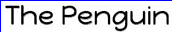

original word:  The Penguin



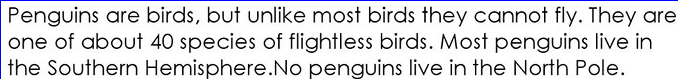

original word:  Penguins are birds, but unlike most birds they cannot fly. They are
one of about 40 species of flightless birds. Most penguins live in
the Southern Hemisohere.No penguins live in the North Pole.



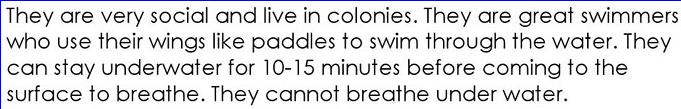

original word:  They are very social and live in colonies. They are great swimmers
who use their wings like paddles to swim through the water. They
can stay underwater for 10-15 minutes before coming to the
surface to breathe. They cannot breathe under water.



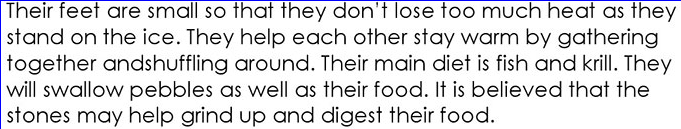

original word:  Their feet are small so that they don't lose too much heat as they
stand on the ice. They help each other stay warm by gathering
together andshuffling around. Their main diet is fish and krill. They
will swallow pebbles as well as their food. It is believed that the
stones may help grind up and digest their food.



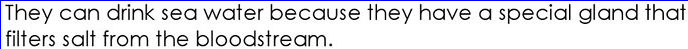

original word:  They can drink sea water because they have a special gland that
filters salt from the bloodstream.



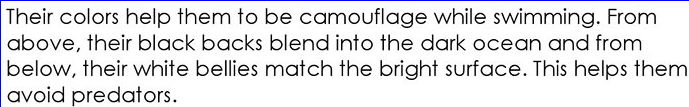

original word:  Their colors help them to be camouflage while swimming. From
above, their black backs blend into the dark ocean and from
below, their white bellies match the bright surface. This helps them
avoid predators.



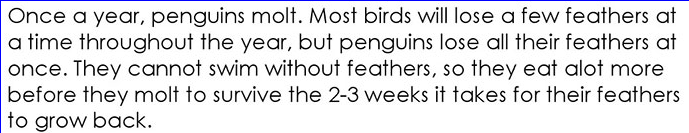

original word:  Once a year, penguins molt. Most birds will lose a few feathers at
atime throughout the year, but penguins lose all their feathers at
once. They cannot swim without feathers, so they eat alot more
before they molt to survive the 2-3 weeks it takes for their feathers
to grow back.



original word:  © www.engiishunite.com



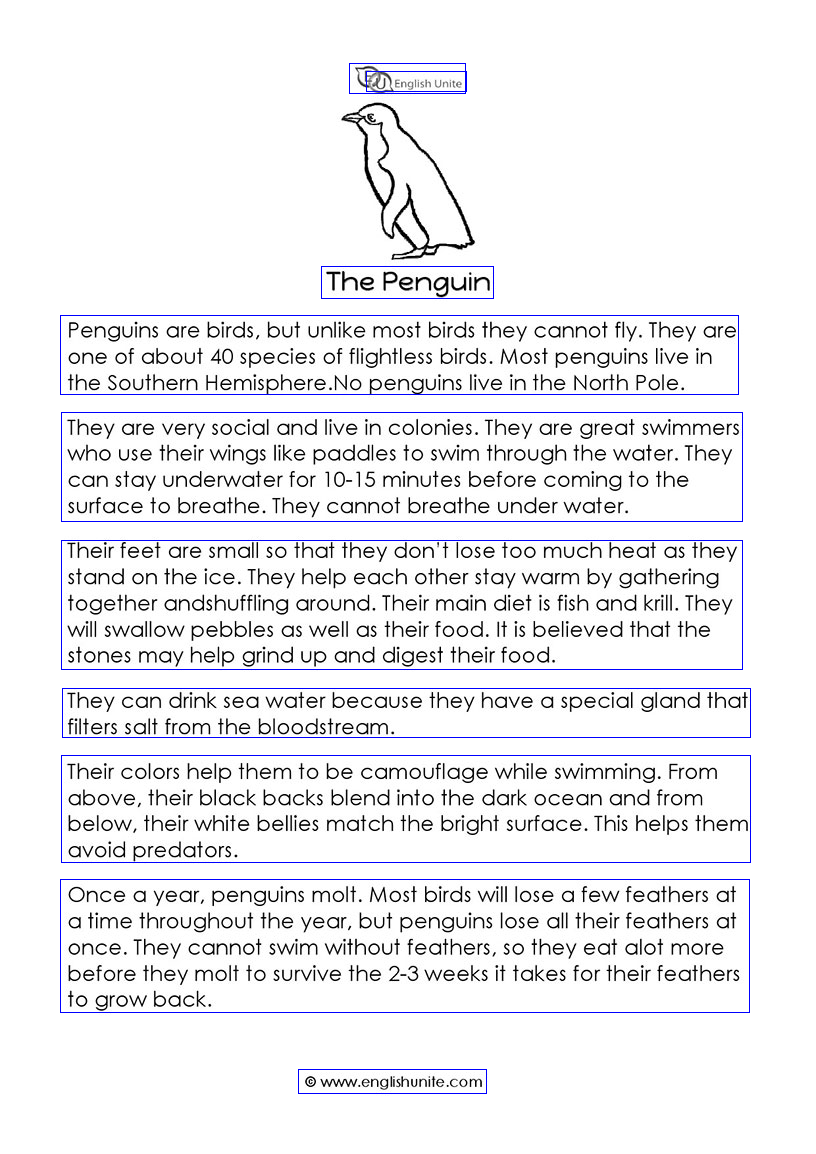

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# image_origin = cv2.imread('PNB.png')
from textblob import TextBlob
color = (255, 0, 0)
i = 0
custom_oem_psm_config = r'--oem 3 --psm 6'
result_data = ''
for box in sorted_boxes:
  x_start = int(box[0])
  y_start = int(box[1])
  x_end = int(box[2])
  y_end = int(box[3])
  point_start = (int(x_start),int(y_start))
  point_end = (int(x_end), int(y_end))
  image_origin = cv2.rectangle(image_origin,point_start,point_end,color, 1)
  i+=1
  cropped_img = image_origin[y_start:y_end, x_start:x_end]
  extractedInformation = pytesseract.image_to_string(cropped_img, lang='eng', config=custom_oem_psm_config)
  if check_string_null(extractedInformation):
    continue
  extractedInformation = remove_extra_newlines(extractedInformation)
  #extractedInformationCorrect #= TextBlob(extractedInformation).correct()
  result_data = result_data + '\n\n'  + extractedInformation
  cv2_imshow(cropped_img)
  print("original word: ", extractedInformation)
  #print("correct word: ", extractedInformationCorrect)

cv2_imshow(image_origin)


In [ ]:
print(result_data)



a English Unite


#A)) English Unite |


The Penguin


Penguins are birds, but unlike most birds they cannot fly. They are
one of about 40 species of flightless birds. Most penguins live in
the Southern Hemisohere.No penguins live in the North Pole.


They are very social and live in colonies. They are great swimmers
who use their wings like paddles to swim through the water. They
can stay underwater for 10-15 minutes before coming to the
surface to breathe. They cannot breathe under water.


Their feet are small so that they don't lose too much heat as they
stand on the ice. They help each other stay warm by gathering
together andshuffling around. Their main diet is fish and krill. They
will swallow pebbles as well as their food. It is believed that the
stones may help grind up and digest their food.


They can drink sea water because they have a special gland that
filters salt from the bloodstream.


Their colors help them to be camouflage while swimming. From
above, their b

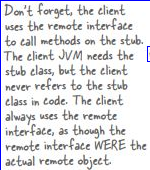

    

Don't Forget, the client
sees the remote inberEace
{eo call methods on the stsb.
The client JVM needs the
stab las, but the clint
never refers to the stub
lass in Code. The cient.
always wes the remote
inkerface, as though the
venobe interface WERE the
iabbod Cccobe euunk:

 



In [ ]:
x_start_test = int(boxes.xyxy[0][0])
y_start_test = int(boxes.xyxy[0][1])
x_end_test = int(boxes.xyxy[0][2])
y_end_test = int(boxes.xyxy[0][3])



In [ ]:
import pytesseract


In [ ]:
extractedInformation

"    \n\nDon't Forget, the client\nsees the remote inberEace\n{eo call methods on the stsb.\nThe client JVM needs the\nstab las, but the clint\nnever refers to the stub\nlass in Code. The cient.\nalways wes the remote\ninkerface, as though the\nvenobe interface WERE the\niabbod Cccobe euunk:\n\n \n\x0c"

In [ ]:
print(extractedInformation)

    

Don't Forget, the client
sees the remote inberEace
{eo call methods on the stsb.
The client JVM needs the
stab las, but the clint
never refers to the stub
lass in Code. The cient.
always wes the remote
inkerface, as though the
venobe interface WERE the
iabbod Cccobe euunk:

 



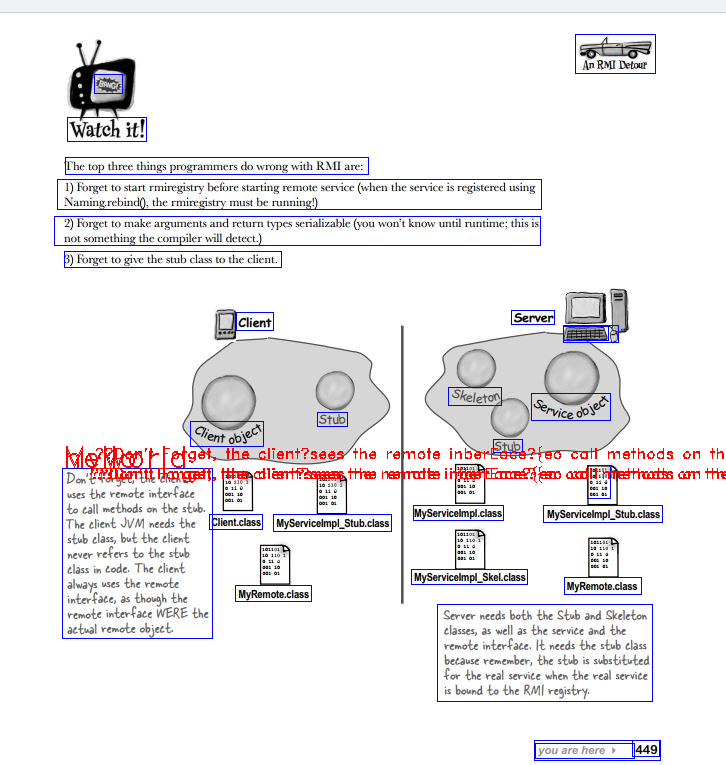

In [ ]:
temp = image_origin
position = (x_start_test-5, y_start_test + 10)  # Vị trí để in văn bản, ngay trên hộp giới hạn
img_hello = cv2.putText(temp, extractedInformation, position, cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,255), 1)
cv2_imshow(image_origin)d

In [ ]:
import shutil

# Đường dẫn nguồn
source = "/content/runs"

# Đường dẫn đích
destination = "/content/gdrive/MyDrive/train_model/runs"

# Di chuyển nội dung từ nguồn đến đích
shutil.copytree(source, destination)


'/content/gdrive/MyDrive/train_model/runs'

In [ ]:
!pip install tesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=bb439bedd0363e5c11444c5c02963812ac70d8c3501ecd0e5302c57cd2bab419
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [ ]:
!pip install pytesseract

In [ ]:
import pytesseract
from PIL import Image
print(pytesseract.image_to_string(Image.open('/content/Capture.JPG')))

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.